# RESEARCH QUESTIONS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from scipy import stats
import numpy as np
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.f' % x)

### Research Question 1

#### Authors Data

In [3]:
import pandas as pd
json_file_path = 'lighter_authors.json'
chunk_size = 100000

df_list = []
for chunk in pd.read_json(json_file_path, lines=True, chunksize=chunk_size):
    df_list.append(chunk)

authors_df = pd.concat(df_list)

In [4]:
authors_df.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,5,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,4,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,4,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


In [6]:
authors_df.describe()

,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,351767,351767,351767,351767,351767,351767
mean,4771,4,331,26,7751861,112
std,97694,1,3858,3066,6578409,2661
min,-41,-31,0,0,4,-33
25%,6,4,1,2,1535315,1
50%,39,4,8,6,6470396,4
75%,310,4,53,15,14340410,20
max,27003752,5,608956,1775176,21248016,766035


In [9]:
authors_df = authors_df.applymap(lambda x: str(x) if isinstance(x, list) else x)
duplicate_rows = authors_df.duplicated()
duplicate_rows.sum()


0

In [10]:
# Column-wise missing value count
missing_values_per_column = authors_df.isnull().sum()
print(f'Number of missing values per column:\n{missing_values_per_column}')



Number of missing values per column:
ratings_count         0
average_rating        0
text_reviews_count    0
work_ids              0
book_ids              0
works_count           0
id                    0
name                  0
gender                0
image_url             0
about                 0
fans_count            0
dtype: int64


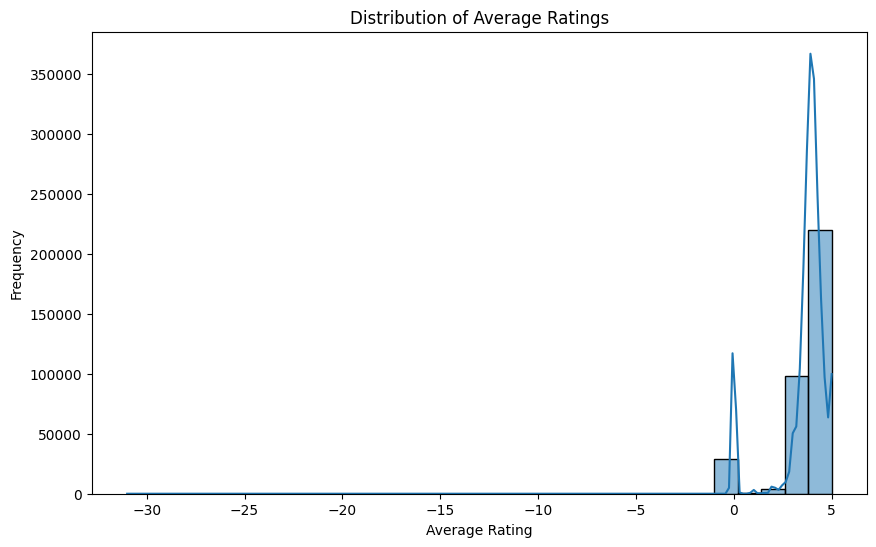

In [11]:
#distribution of Average Ratings
plt.figure(figsize=(10, 6))
sns.histplot(authors_df['average_rating'], bins=30, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

In [12]:
gender_series = authors_df['gender']

#mapping genders to main categories
gender_series = gender_series.str.lower()
gender_map = {
    'male': 'male',
    'female': 'female',
    'genderfluid': 'non-binary',
    'genderqueer': 'non-binary',
    'transgender female': 'female',
    'transgender male': 'male',
    'genderfluid': 'non-binary',
    'genderqueer': 'non-binary',
    'non-binary': 'non-binary',
    'nonbinary': 'non-binary',
    'not specified': 'not specified',
    'neutral': 'non-binary',
    'trans non binary guy': 'non-binary',
    'nonbinary': 'non-binary',
    'nb': 'non-binary',
    'agender': 'non-binary',
    'nonbinary': 'non-binary',
    'adrogynous': 'non-binary',
    'genderfluid': 'non-binary',
    'them': 'non-binary',
    'bigender': 'non-binary',
    'trans': 'non-binary',
    'other': 'other',
    'fluid': 'non-binary',
    'non-binary woman': 'non-binary',
    'learned': 'other',
    'i exist': 'other',
    'male (ftm)': 'male',
    'gender fluid': 'non-binary',
    'bot': 'other',
    'questioning': 'other',
    'agender': 'non-binary',
    'genderless': 'non-binary',
    'somewhere on the continuum': 'non-binary',
    'transgender': 'non-binary',
    'bigender': 'non-binary',
    'transmasculine': 'non-binary',
    'fluid': 'non-binary',
    'non binary': 'non-binary',
    'the voice in your head': 'other',
    'gender nonconforming': 'non-binary',
    'transfeminine': 'non-binary',
    'wolf': 'other',
    'transsexual female': 'female',
    'trans masculine non-binary': 'non-binary',
    'amab': 'male',
    'gender neutral': 'non-binary',
    'neutrois': 'non-binary',
    'human': 'not specified',
    'unsolved': 'other',
    'she/they': 'non-binary',
    'male & female authors': 'other',
    'sissy': 'other',
    'under a female thumb': 'female',
    'they': 'non-binary',
    'greygender, genderfluid': 'non-binary',
    'trans man': 'male',
    'trans-male': 'male',
    'androgynous': 'non-binary',
    'capes': 'other',
    'she/her/hers': 'female',
    'author': 'not specified',
    'effete': 'other',
    'two-spirit': 'non-binary',
    'irrelevant': 'other',
    'non': 'not specified',
    '(he/him)': 'male',
    'nb femme': 'non-binary',
    'queer': 'non-binary',
    'trans femme': 'non-binary',
    'trans female': 'female',
    'femme lesbian': 'female',
    'avocado/she': 'other',
    'mustache machine': 'other',
    'partnership (both)': 'other',
    'twin flames': 'other',
    'gender apathetic': 'non-binary',
    'genderqueer': 'non-binary',
    'enby': 'non-binary',
    'android': 'other',
    'complicated ;)': 'other',
    'genderqueer transfemme': 'non-binary',
    'aporagender, non-binary': 'non-binary',
    'void': 'other',
    'rodent': 'other',
    'udecided': 'other',
    'non-binary genderqueer': 'non-binary',
    'gender fluid woman': 'non-binary',
    'transgender person': 'non-binary',
    'undefined': 'not specified',
    'x': 'not specified',
    'nonbinary woman': 'non-binary',
    'soft boy': 'male',
    'trans man': 'male',
    'couple (man and woman)': 'other',
    'spirit': 'other',
    'witches': 'other',
    'non-binary genderfluid': 'non-binary',
    'nonbinary, genderfluid, genderqueer': 'non-binary',
    'spirits have no gender or age': 'other',
    'trans woman': 'female',
    'they/them': 'non-binary',
    'sin': 'other',
    'woman': 'female',
    'gender fluid transperson': 'non-binary',
    'wizardess': 'female',
    'bigender (female and agender)': 'non-binary',
    'fifth gender': 'other',
    'travesti': 'other',
    'transwoman': 'female',
    'maverique': 'non-binary',
    'platypus': 'other',
    'agenderflux': 'non-binary',
    'i have no idea': 'other',
    'muppet': 'other',
    'abbudabbi': 'other',
    'genderqueer femme': 'non-binary',
    'trans male': 'male',
    'transgender woman': 'female',
    'genderq': 'non-binary',
    'non binary': 'non-binary',
    'genderqueen': 'other',
    'tomboy': 'female',
}

# For any unclassified or joke entries
default_gender = 'other'
cleaned_gender_series = gender_series.map(lambda x: gender_map.get(x, default_gender))
cleaned_gender_series = cleaned_gender_series.fillna('not specified')
authors_df['gender'] = cleaned_gender_series
cleaned_gender_series

0           male
1           male
2         female
3           male
4           male
           ...  
351762      male
351763      male
351764      male
351765      male
351766     other
Name: gender, Length: 351767, dtype: object

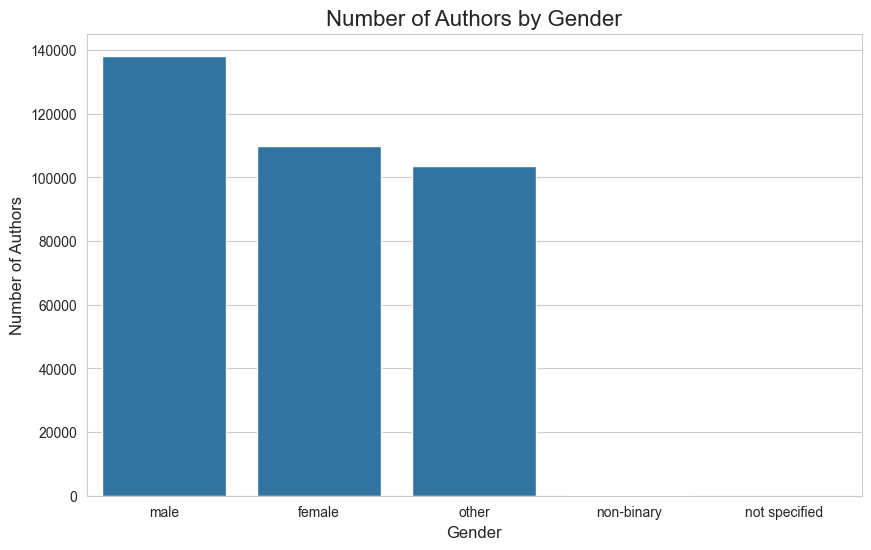

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#count the number of authors by gender
gender_counts = cleaned_gender_series.value_counts()

#create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)

#add title and labels
plt.title('Number of Authors by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Authors', fontsize=12)

plt.show()

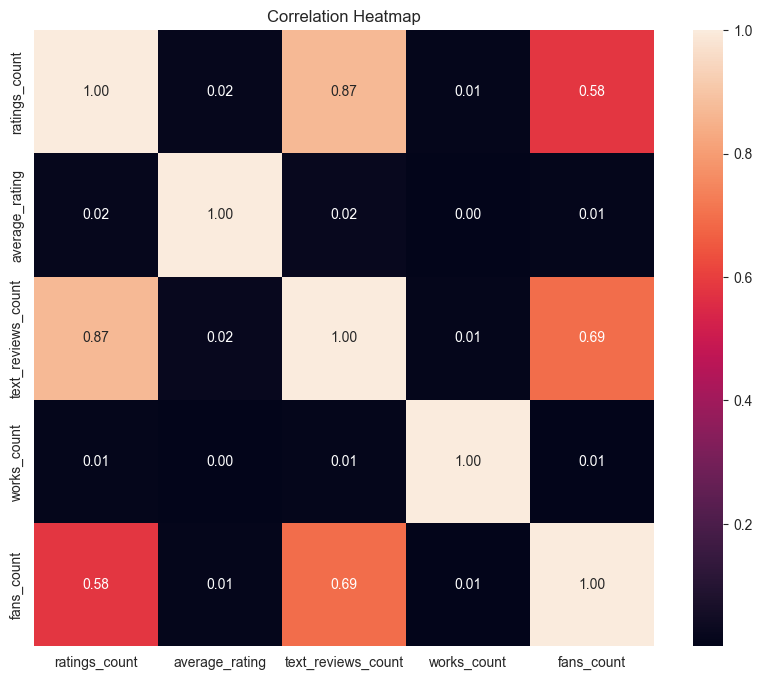

In [15]:
#correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(authors_df[['ratings_count', 'average_rating', 'text_reviews_count', 'works_count', 'fans_count']].corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Book Data

In [65]:
books_df = pd.read_parquet('lighter_books.parquet')
books_df

,title,author_id,author_name,work_id,language,average_rating,rating_dist,ratings_count,text_reviews_count,publication_date,format,num_pages,series_name
0,Harry Potter and the Order of the Phoenix (Har...,1077326,J.K. Rowling,2809203,eng,4,5:1674064|4:664833|3:231195|2:41699|1:16215|to...,2628006,44716,2004-09,Paperback,870,Harry Potter
1,Harry Potter and the Sorcerer's Stone (Harry P...,1077326,J.K. Rowling,4640799,eng,4,5:4801606|4:1681521|3:623286|2:145898|1:125040...,7377351,116930,2003-11-01,Hardcover,309,Harry Potter
2,Harry Potter and the Chamber of Secrets (Harry...,1077326,J.K. Rowling,6231171,eng,4,5:1690166|4:781011|3:313727|2:54687|1:15453|to...,2855044,55286,2003-11-01,Hardcover,352,Harry Potter
3,Harry Potter and the Prisoner of Azkaban (Harr...,1077326,J.K. Rowling,2402163,eng,5,5:1994597|4:696545|3:212678|2:28915|1:13959|to...,2946694,58023,2004-05-01,Mass Market Paperback,435,Harry Potter
4,Harry Potter and the Goblet of Fire (Harry Pot...,1077326,J.K. Rowling,3046572,eng,5,5:1808039|4:663849|3:193604|2:27759|1:12425|to...,2705676,48637,2002-09-28,Paperback,734,Harry Potter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027426,Julie eller Den nya Héloïse BOK I,7994,Jean-Jacques Rousseau,675961,swe,3,5:7|4:11|3:16|2:13|1:4|total:51,51,0,1999,Hardcover,597,
7027427,A Frozen Heart,3510823,Walt Disney Company,43265330,eng,4,5:556|4:518|3:443|2:128|1:38|total:1683,1683,299,2015-08-25,Kindle Edition,304,
7027428,O Segredo Da Serpente,5614141,Stephen Cole,439783,por,4,5:236|4:346|3:269|2:102|1:33|total:986,986,99,2011,Paperback,320,Thieves Like Us
7027429,Lives of Mahomet and his successors,28525,Washington Irving,68547028,,4,5:5|4:8|3:2|2:2|1:1|total:18,18,1,,,NaN,


In [17]:
books_df.describe()


,author_id,work_id,average_rating,ratings_count,text_reviews_count,num_pages
count,7027431,7027431,7027431,7027431,7027431,3955596
mean,1977793,13985331,3,19459,642,3050
std,3210660,15356372,1,160901,4170,2327717
min,4,62,0,0,0,0
25%,33682,1564717,3,3,0,132
50%,249946,6759579,4,45,5,232
75%,3239281,21987948,4,771,64,344
max,21248016,89721607,5,7400639,174524,2147483647


In [18]:
print('Before Dropping duplicates : ', books_df.shape)
books_df.drop_duplicates(inplace=True)
print('After Dropping duplicates : ', books_df.shape)

Before Dropping duplicates :  (7027431, 13)
After Dropping duplicates :  (6713859, 13)


In [19]:
#column-wise missing value count
missing_values_per_column = books_df.isnull().sum()
print(f'Number of missing values per column:\n{missing_values_per_column}')


Number of missing values per column:
title                       0
author_id                   0
author_name                 0
work_id                     0
language                    0
average_rating              0
rating_dist                 0
ratings_count               0
text_reviews_count          0
publication_date            0
format                      0
num_pages             2819465
series_name                 0
dtype: int64


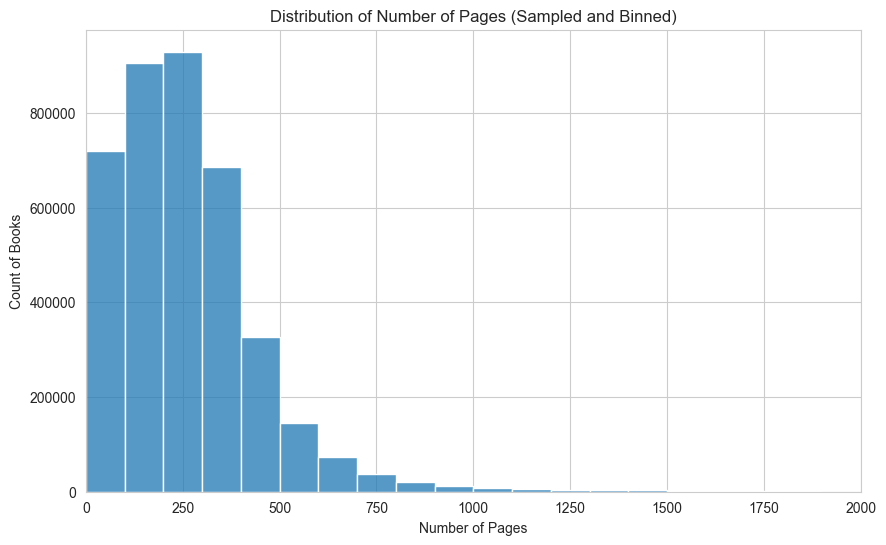

In [21]:
#distribution of number of pages
plt.figure(figsize=(10, 6))
bins = range(0, 2000, 100) 
sns.histplot(books_df['num_pages'], bins=bins, kde=False)
plt.title('Distribution of Number of Pages (Sampled and Binned)')
plt.xlim(0, 2000) 
plt.xlabel('Number of Pages')
plt.ylabel('Count of Books')
plt.show()


In [22]:
top_50_languages = books_df[books_df['language'] != '']['language'] #discard empty  strings language
top_50_languages.value_counts()

language
eng    1333220
ger     146500
spa     136351
ita     124904
fre     119833
        ...   
lad          1
men          1
bnt          1
chn          1
bad          1
Name: count, Length: 339, dtype: int64

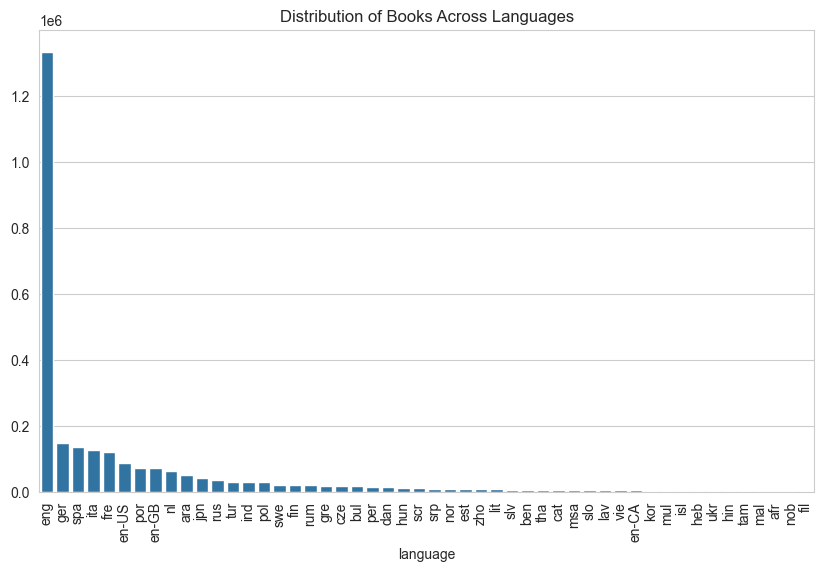

In [23]:
#distribution of books across languages
#show only top 50 languages
top_50_languages = books_df[books_df['language'] != '']['language'] #discard empty  strings language
top_50_languages = top_50_languages.value_counts()[:50]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_50_languages.index, y=top_50_languages.values);
plt.title('Distribution of Books Across Languages')
plt.xticks(rotation=90);


In [25]:
books_df

,title,author_id,author_name,work_id,language,average_rating,rating_dist,ratings_count,text_reviews_count,publication_date,format,num_pages,series_name
0,Harry Potter and the Order of the Phoenix (Har...,1077326,J.K. Rowling,2809203,eng,4,5:1674064|4:664833|3:231195|2:41699|1:16215|to...,2628006,44716,2004-09,Paperback,870,Harry Potter
1,Harry Potter and the Sorcerer's Stone (Harry P...,1077326,J.K. Rowling,4640799,eng,4,5:4801606|4:1681521|3:623286|2:145898|1:125040...,7377351,116930,2003-11-01,Hardcover,309,Harry Potter
2,Harry Potter and the Chamber of Secrets (Harry...,1077326,J.K. Rowling,6231171,eng,4,5:1690166|4:781011|3:313727|2:54687|1:15453|to...,2855044,55286,2003-11-01,Hardcover,352,Harry Potter
3,Harry Potter and the Prisoner of Azkaban (Harr...,1077326,J.K. Rowling,2402163,eng,5,5:1994597|4:696545|3:212678|2:28915|1:13959|to...,2946694,58023,2004-05-01,Mass Market Paperback,435,Harry Potter
4,Harry Potter and the Goblet of Fire (Harry Pot...,1077326,J.K. Rowling,3046572,eng,5,5:1808039|4:663849|3:193604|2:27759|1:12425|to...,2705676,48637,2002-09-28,Paperback,734,Harry Potter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027426,Julie eller Den nya Héloïse BOK I,7994,Jean-Jacques Rousseau,675961,swe,3,5:7|4:11|3:16|2:13|1:4|total:51,51,0,1999,Hardcover,597,
7027427,A Frozen Heart,3510823,Walt Disney Company,43265330,eng,4,5:556|4:518|3:443|2:128|1:38|total:1683,1683,299,2015-08-25,Kindle Edition,304,
7027428,O Segredo Da Serpente,5614141,Stephen Cole,439783,por,4,5:236|4:346|3:269|2:102|1:33|total:986,986,99,2011,Paperback,320,Thieves Like Us
7027429,Lives of Mahomet and his successors,28525,Washington Irving,68547028,,4,5:5|4:8|3:2|2:2|1:1|total:18,18,1,,,NaN,


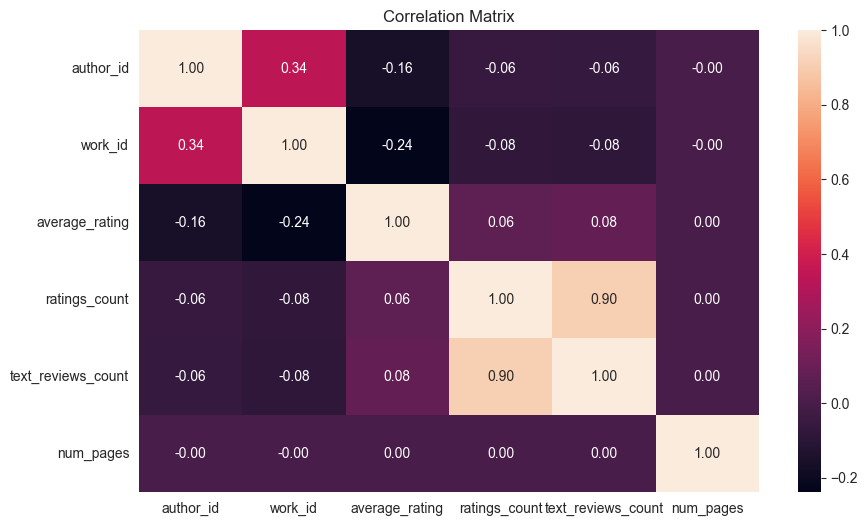

In [26]:

import matplotlib.pyplot as plt

#only numeric columns
numeric_df = books_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Research Question 2

#### 1.Plot the number of books for each author in descending order.


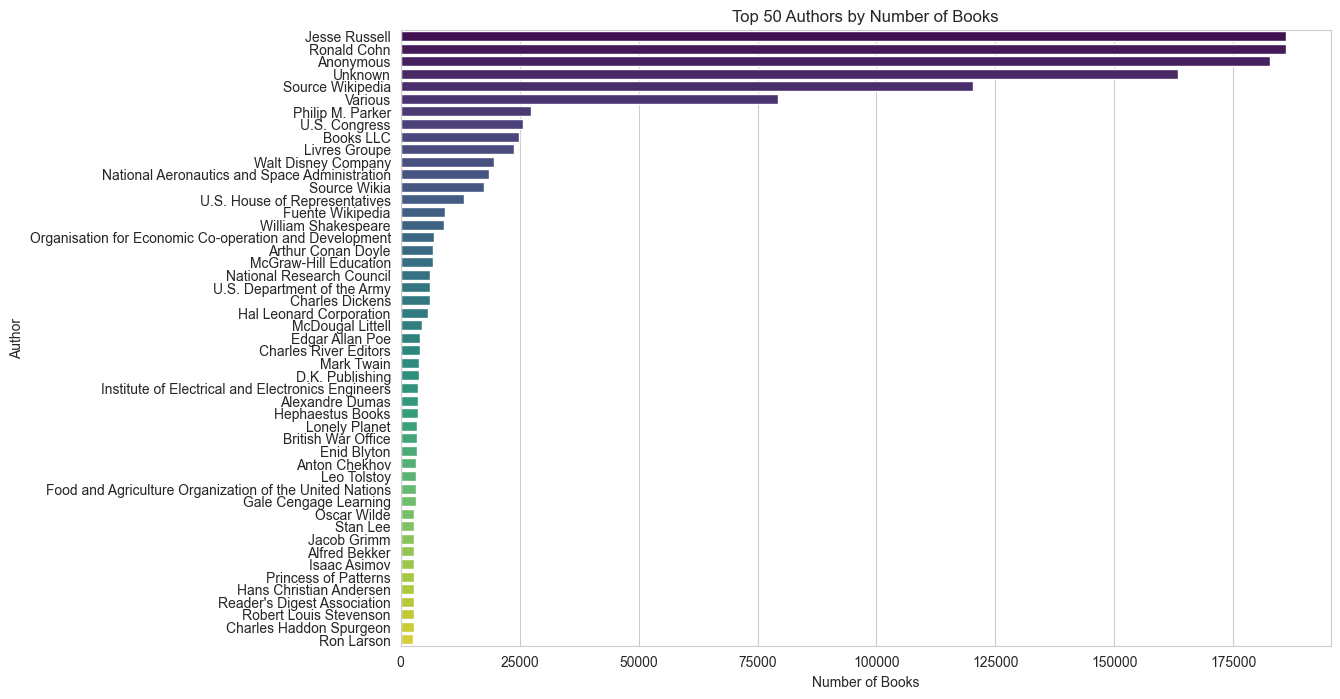

In [27]:
sorted_authors = authors_df.sort_values('works_count', ascending=False)
top_50 = sorted_authors.head(50)
top_50 = top_50[1:] #first author name seems not a book, i will discard it.
plt.figure(figsize=(12, 8))
sns.barplot(x=top_50['works_count'], y=top_50['name'], palette="viridis")
plt.title('Top 50 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()


#### 2.Which book has the highest number of reviews?


In [28]:
highest_reviews_book = books_df.sort_values(by='text_reviews_count', ascending=False).iloc[0]
print("The book with the highest number of reviews is:")
print(highest_reviews_book['title'])
print("by: ", highest_reviews_book['author_name'])
print("Number of reviews:", highest_reviews_book['text_reviews_count'])
print("Average rating:", highest_reviews_book['average_rating'])
print("Number of pages:", highest_reviews_book['num_pages'])
print("Language:", highest_reviews_book['language'])
print("Publication date:", highest_reviews_book['publication_date'])
print("format:", highest_reviews_book['format'])



The book with the highest number of reviews is:
The Hunger Games (Hunger Games, #1)
by:  Suzanne Collins
Number of reviews: 174524
Average rating: 4.32
Number of pages: nan
Language: en-US
Publication date: 
format: 


#### 3.Which are the top ten and ten worst books concerning the average score?


* There are many books have 5.00 and 0.00 ratings. So, I will prioritize books not only with their rating but also their rating_counts for top ten and worst ten selections.

In [29]:
top_worst_ten_books = books_df[books_df['ratings_count'] > 0] #discard 0 ratings_count, because average_ratings is 0 for those books.

top_ten_books = top_worst_ten_books.sort_values(by=['average_rating', 'ratings_count'], ascending=[False, False]).head(10)
worst_ten_books = top_worst_ten_books.sort_values(by=['average_rating', 'ratings_count'], ascending=[True, False]).head(10)

print("Top Ten Books by Average Rating and Rating Counts:")
print(top_ten_books[['title', 'average_rating', 'ratings_count']])

print("\nWorst Ten Books by Average Rating and Rating Counts:")
print(worst_ten_books[['title', 'average_rating', 'ratings_count']])


Top Ten Books by Average Rating and Rating Counts:
                                                     title  average_rating  \
4851446  Optimized Nutrition:: A strategic guide for th...               5   
5782558  Optimized Nutrition Vol. 4: Building a Bigger ...               5   
6133847  Optimized Nutrition Vol. 5 Building a huge big...               5   
6367886                         Optimized Nutrition Vol. 6               5   
6567263                         Optimized Nutrition Vol. 7               5   
6909719  Optimized Nutrition Vol. 8: Building Anabolic ...               5   
6408367                                               Mora               5   
3463729  A Muezzin from the Tower of Darkness Cries: Tr...               5   
6111305       Children's Virtues N is for Nobility Book 14               5   
6284623              Children's Virtues: N is for Nobility               5   

         ratings_count  
4851446            216  
5782558            211  
6133847        

* There are multiple books in the list with the same title and author, but different features. This is because they are different editions of the same book (e.g., paperback, hardcover, etc. or different languages).

#### 4. Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

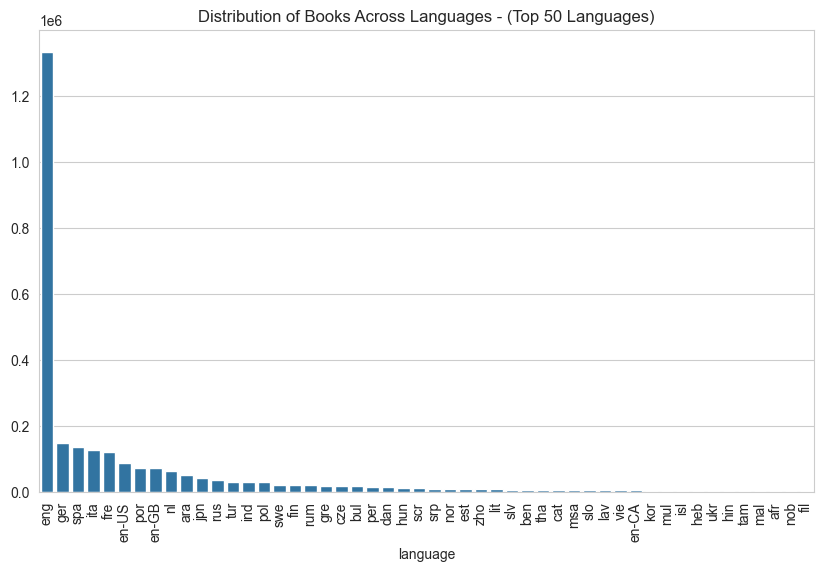

In [30]:
#distribution of books across languages
#show only top 50 languages
top_50_languages = books_df[books_df['language'] != '']['language'] #discard empty  strings language
top_50_languages = top_50_languages.value_counts()[:50]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_50_languages.index, y=top_50_languages.values);
plt.title('Distribution of Books Across Languages - (Top 50 Languages)')
plt.xticks(rotation=90);


#### How many books have more than 250 pages?


In [31]:
books_over_250_pages = books_df[books_df['num_pages'] > 250].shape[0]
print(f"There are {books_over_250_pages} books with more than 250 pages.")


There are 1778395 books with more than 250 pages.


#### 6. Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).


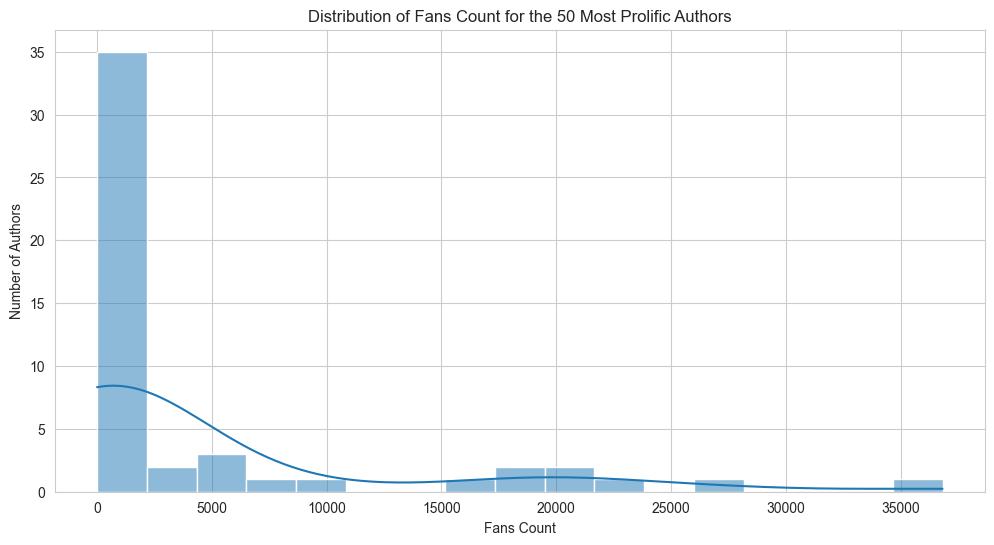

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
#most prolific authors
most_prolific_authors = authors_df.sort_values(by='works_count', ascending=False).head(50)
plt.figure(figsize=(12, 6))
sns.histplot(most_prolific_authors['fans_count'], kde=True)
plt.title('Distribution of Fans Count for the 50 Most Prolific Authors')
plt.xlabel('Fans Count')
plt.ylabel('Number of Authors')
plt.show()


### Research Question 3

#### 1. Write a function that takes as input a year and returns as output the following information:

* The number of books published that year.

* The total number of pages written that year.

* The most prolific month of that year.

* The longest book written that year.

In [33]:
def get_books_info_by_year(books_df, input_year):
    #converting to datetime
    books_df['publication_date'] = pd.to_datetime(books_df['publication_date'], errors='coerce')
    books_df['pub_year'] = books_df['publication_date'].dt.year
    books_df['pub_month'] = books_df['publication_date'].dt.month
    
    #converting to numeric
    books_df['num_pages'] = pd.to_numeric(books_df['num_pages'], errors='coerce').fillna(0).astype(int)
    
    year_books_df = books_df[books_df['pub_year'] == input_year]
    number_of_books = year_books_df.shape[0]
    total_pages = year_books_df['num_pages'].sum()
    most_prolific_month = year_books_df['pub_month'].value_counts().idxmax()

    #longest book informations
    longest_book_row = year_books_df.loc[year_books_df['num_pages'].idxmax()]
    longest_book = longest_book_row['title']

    return {
        'year': input_year,
        'number_of_books': number_of_books,
        'total_pages': total_pages,
        'most_prolific_month': most_prolific_month,
        'longest_book': longest_book
    }


books_info = get_books_info_by_year(books_df, 2010)
books_info

{'year': 2010,
 'number_of_books': 15686,
 'total_pages': 3788946,
 'most_prolific_month': 10.0,
 'longest_book': 'LONGEST BOOK written by a mortal - COLLECTED POETRY'}

#### 2. Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.

First 10 years
      number_of_books  total_pages  most_prolific_month  \
year                                                      
1732                1           40                    1   
1754                1            0                   12   
1771                1            8                    1   
1789                1            1                   10   
1809                1            0                    1   
1811                1          436                   11   
1820                1           39                   10   
1830                2         1151                    3   
1831                1            0                    5   
1832                2          396                    7   

                                           longest_book  
year                                                     
1732  Christian Charity OR The Duty of Charity to th...  
1754                                          Lysimaque  
1771  Propositiones philosophicae ex logica 

Text(0.5, 1.0, 'Number of Books Published Each Year (Last 10 Years)')

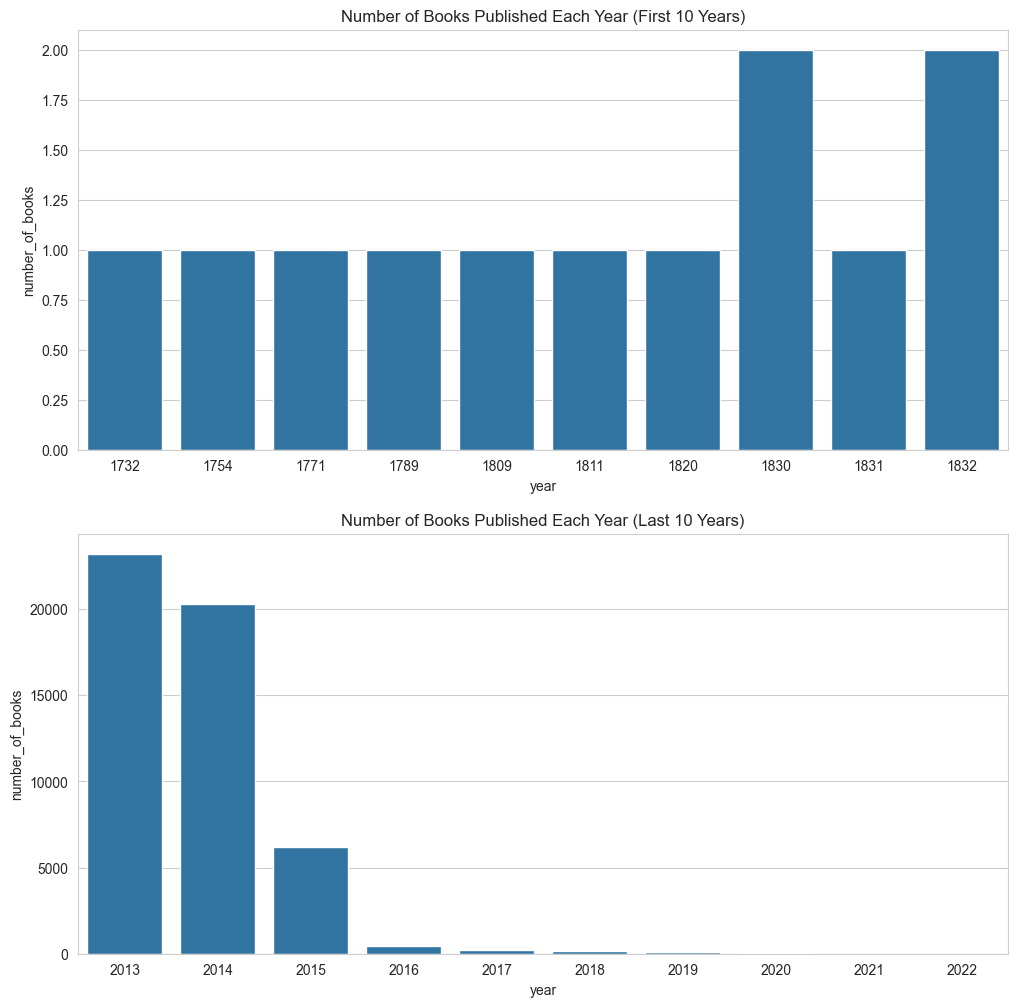

In [34]:
#filter out dates further than 2023
valid_date_books_df = books_df[books_df['publication_date'] < '2023-11-01']
years = valid_date_books_df['publication_date'].dt.year.dropna().unique()
years.sort()
first_ten_years = years[:10]
latest_ten_years = years[-10:]

first_ten_years_df = pd.DataFrame([get_books_info_by_year(books_df, year) for year in first_ten_years])
first_ten_years_df = first_ten_years_df.set_index('year')
last_ten_years_df = pd.DataFrame([get_books_info_by_year(books_df, year) for year in latest_ten_years])
last_ten_years_df = last_ten_years_df.set_index('year')

print('First 10 years')
print(first_ten_years_df)

print('\nLast 10 years')
print(last_ten_years_df)

fig, axes = plt.subplots(2, 1, figsize=(12, 12))
sns.barplot(ax=axes[0], x=first_ten_years_df.index, y=first_ten_years_df['number_of_books'])
axes[0].set_title('Number of Books Published Each Year (First 10 Years)')
sns.barplot(ax=axes[1], x=last_ten_years_df.index, y=last_ten_years_df['number_of_books'])
axes[1].set_title('Number of Books Published Each Year (Last 10 Years)')

#### 3. Ask ChatGPT or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it.
* I sent my solution trial to give an idea to Chagpt.
* I explained the dataframe column by column to chatgpt.
* After that I explained the result I desired.
* I got the correct result, you can see the code below.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to process books info by year
def get_books_info_by_year_range(df, years):
    year_info = []
    for year in years:
        year_data = df[df['publication_date'].dt.year == year]
        year_info.append({
            'year': year,
            'number_of_books': year_data.shape[0]
        })
    return pd.DataFrame(year_info).set_index('year')

# Convert 'publication_date' to datetime and filter out dates beyond a certain point
books_df['publication_date'] = pd.to_datetime(books_df['publication_date'])
valid_date_books_df = books_df.query('publication_date < "2023-11-01"')
# Get unique years and sort
years = valid_date_books_df['publication_date'].dt.year.dropna().unique()
years.sort()

# Split the years into first and last ten
first_ten_years = years[:10]
latest_ten_years = years[-10:]

# Get the books info by the given year ranges
first_ten_years_df = get_books_info_by_year_range(valid_date_books_df, first_ten_years)
last_ten_years_df = get_books_info_by_year_range(valid_date_books_df, latest_ten_years)

print('First 10 years')
print(first_ten_years_df)

print('\nLast 10 years')
print(last_ten_years_df)



First 10 years
      number_of_books
year                 
1732                1
1754                1
1771                1
1789                1
1809                1
1811                1
1820                1
1830                2
1831                1
1832                2

Last 10 years
      number_of_books
year                 
2013            23218
2014            20326
2015             6223
2016              459
2017              240
2018              136
2019               71
2020               43
2021                8
2022                1


### Research Question 4

#### 1. You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?

In [38]:
import pandas as pd

duplicates = authors_df[authors_df.duplicated('name', keep=False)]
if duplicates.empty:
    print("There are no eponymous authors in the dataset.")
else:
    print("There are eponymous authors in the dataset. See details below:")
    duplicated_names = duplicates.groupby('name').size()
    print(duplicated_names)



There are eponymous authors in the dataset. See details below:
name
Boris Zakhoder                  2
Caroline Miller                 2
Catherine   Jones               2
Chris Lynch                     2
Christopher Phillips            2
Cicerón                         2
David  Nelson                   2
David Yates                     2
Dimitar Dimov                   2
Erin  Bedford                   2
George  Franklin                2
Hildegard von Bingen            2
Jackson Butch Guice             2
James C.L. Carson               2
James Kent                      2
John  Mole                      2
Jorge Molina                    2
Joseph Fink                     2
Julie  Campbell                 2
Katherine Mercurio Gotthardt    2
M.K. Graff                      2
Martin    Shaw                  2
Mike   Lee                      2
Paul      Davies                2
Paul Graham                     2
Peter      Marshall             2
Peter    Green                  2
Peter  Davies 

#### 2.Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.


In [41]:
def get_authors_books(author_ids, books_df):
    filtered_books = books_df[books_df['author_id'].isin(author_ids)] #filter out books by the given author IDs
    books_grouped = filtered_books.groupby('author_id')['title'].apply(list) #group books by author ID and get a list of book titles
    author_books_dict = books_grouped.to_dict() #convert to dictionary
    for author_id in author_ids:
        author_books_dict.setdefault(author_id, [])
    return author_books_dict

#example
author_ids_list = [4, 7,100] 
authors_books = get_authors_books(author_ids_list, books_df)

for author_id, books in authors_books.items():
    print(f'Author ID: {author_id}')
    print(f'Books: {books}')
    print('---')

Author ID: 4
Books: ["The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1)", "The Ultimate Hitchhiker's Guide: Five Complete Novels and One Story (Hitchhiker's Guide to the Galaxy, #1-5)", "The Ultimate Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1-5)", "The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1)", "The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1)", "The Hitchhiker's Guide to the Galaxy: Quandary Phase (Hitchhiker's Guide: Radio Play, #4)", "The Ultimate Hitchhiker's Guide (Hitchhiker's Guide to the Galaxy, #1-5)", "The Hitchhiker's Guide to the Galaxy: Quintessential Phase (Hitchhiker's Guide: Radio Play, #5)", 'The Long Dark Tea-Time of the Soul (Dirk Gently, #2)', "Dirk Gently's Holistic Detective Agency (Dirk Gently, #1)", 'The Salmon of Doubt (Dirk Gently, #3)', "Mostly Harmless (Hitchhiker's Guide to the Galaxy, #5)", "Life, the Universe and Everything (Hitchhiker's Guide, 

#### 3. What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?


In [42]:
top_authors = authors_df.nlargest(20, 'average_rating') #get top 20 authors by average rating

is_top_author = books_df['author_id'].isin(top_authors['id']) #filter out books by top authors
top_authors_books = books_df[is_top_author] #filter out books by top authors
top_authors_books['title_length'] = top_authors_books['title'].str.len() #calculate title lengths for top authors' books


#find the longest title book among top authors' books
top_authors_longest_title_book = top_authors_books.loc[top_authors_books['title_length'].idxmax()]

#calculate title lengths for all books
books_df['title_length'] = books_df['title'].str.len()

#find the longest title book overall
longest_title_book_overall = books_df.loc[books_df['title_length'].idxmax()]

#compare the longest title book among top authors' books with the longest title book overall
if top_authors_longest_title_book['title_length'] == longest_title_book_overall['title_length']:
    print(f"Top authors' longest book title length ({top_authors_longest_title_book['title_length']}) is equal to overall longest title length ({longest_title_book_overall['title_length']}).")
else:
    print(f"Top authors' longest book title length ({top_authors_longest_title_book['title_length']}) is not equal to overall longest title length ({longest_title_book_overall['title_length']}).")

# Print the longest book titles
print(f"Longest title among top authors' books: {top_authors_longest_title_book['title']}")
print(f"Longest title overall: {longest_title_book_overall['title']}")


Top authors' longest book title length (83) is not equal to overall longest title length (255).
Longest title among top authors' books: The Frog Who Could Not Croak: Phonemic Awareness Tale #4 (Phonemic Awareness Tales)
Longest title overall: The New England Primer Issued Prior to 1830: A Bibliographical Checklist for the More Easy Attaining the True Knowledge of This Book, Embellished with a Hundred Cuts and Now Revised, Greatly Improved and Arranged in Two Alaphabets; With Preface, Introd...


#### 4.What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.

In [43]:
title_exist_df = books_df[books_df['title']  != '']
title_exist_df['title_length'] = title_exist_df['title'].apply(len)

shortest_title_length = title_exist_df['title_length'].min()
shortest_title_book = title_exist_df.loc[title_exist_df['title_length'].idxmin()]


print("The shortest book title in the dataset is:", shortest_title_book['title'])

The shortest book title in the dataset is: a


### Research Question 5

#### 1.Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?



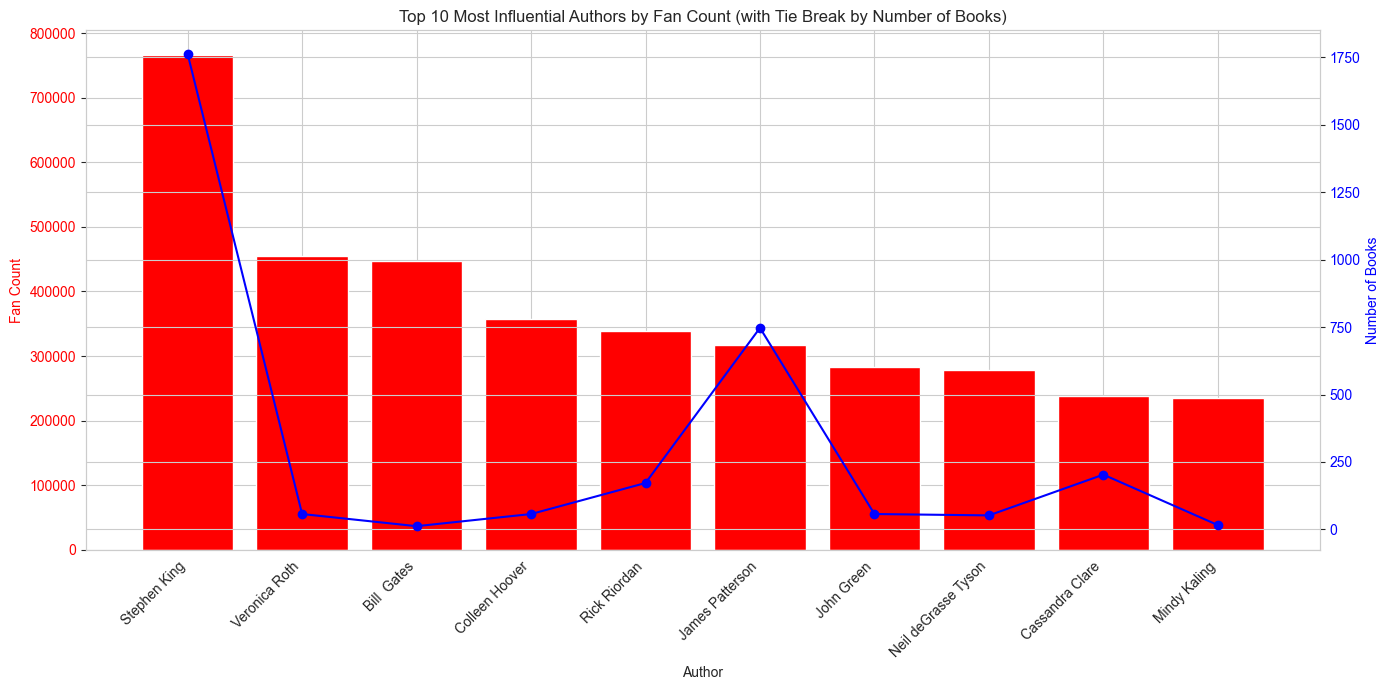

In [44]:
top_authors = authors_df.sort_values(by=['fans_count', 'works_count'], ascending=[False, False]).head(10)

fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Author')
ax1.set_ylabel('Fan Count', color='red')
ax1.bar(top_authors['name'], top_authors['fans_count'], color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Number of Books', color='blue')
ax2.plot(top_authors['name'], top_authors['works_count'], color='blue', marker='o')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.set_title('Top 10 Most Influential Authors by Fan Count (with Tie Break by Number of Books)')
ax1.set_xticklabels(top_authors['name'], rotation=45, ha='right')

fig.tight_layout()
plt.show()



* Stephen King is the leader both based on Fan Count and Books count. So, we can say that he is the most influential author.

#### 2.Have they published any series of books? If any, extract the longest series name among these authors.



In [45]:
top_authors_books = books_df[books_df['author_id'].isin(top_authors['id'].unique())]
#creating series name length
top_authors_books['series_name_length'] = top_authors_books['series_name'].apply(len)

#find the longest series title among the top authors' books
longest_series_title_book = top_authors_books.loc[top_authors_books['series_name_length'].idxmax()]
longest_series_title_book['series_name']

'Percy Jackson and the Olympians: The Graphic Novels'

#### 3.How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.

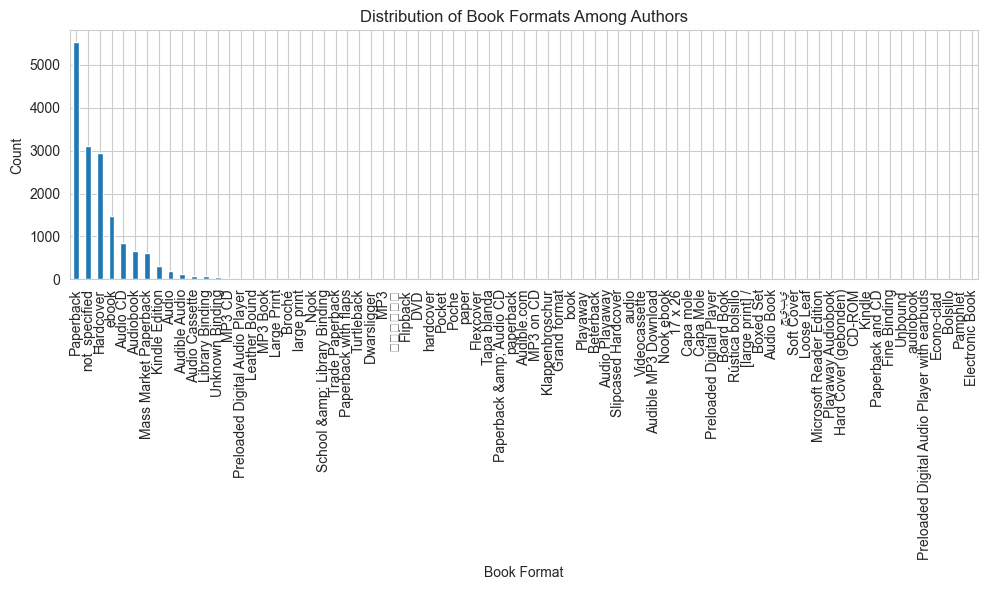

In [46]:
not_format_mask = top_authors_books['format'] == ''
top_authors_books.loc[not_format_mask,'format'] = 'not_specified' #replace empty  strings format with not_specified
format_counts = top_authors_books['format'].value_counts()

plt.figure(figsize=(10, 6))
format_counts.plot(kind='bar')
plt.title('Distribution of Book Formats Among Authors')
plt.xlabel('Book Format')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* As expected, paperback is the most popular format among the top authors. It is also interesting that although ebooks are getting popular day by day, among the top authors they have still almost least popular format.

#### 4.Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.” You may want to have a look at the following recommended readings:



In [47]:
gender_bias_analysis = authors_df.groupby('gender').agg({
    'ratings_count': ['mean', 'median'],
    'average_rating': ['mean', 'median'],
    'text_reviews_count': ['mean', 'median'],
    'fans_count': ['mean', 'median']
})

# Print the analysis results
gender_bias_analysis

ratings_count        average_rating        text_reviews_count  \
                       mean median           mean median               mean   
gender                                                                        
female                 6500     70              4      4                507   
male                   5367     40              4      4                304   
non-binary             1836     32              4      4                343   
not specified            44     40              4      4                 14   
other                  2144     21              4      4                180   

                     fans_count         
              median       mean median  
gender                                  
female            17        181      9  
male               7         96      3  
non-binary        11        133     10  
not specified      8         24      7  
other              4         59      2

* Female authors have the highest mean and median ratings count and text reviews count, as well as the highest mean and median fans count. This can suggests that female authors, on average, are receiving more attention and engagement from readers compared to other genders.

* While the top male authors do quite well (especially among the top_authors) , overall, female authors receive more consistent engagement across the board.

* non-binary authors, on average, are rated highly by those who read their books, and despite having a lower overall ratings count, they have a higher median fan count, indicating a potentially strong and engaged fan base.


### Reserach Question 6
For this question, consider the top 10 authors concerning the number of fans again.



#### 1.Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?

In [54]:
top_authors = authors_df.nlargest(10, 'fans_count')
top_authors_books = books_df[books_df['author_id'].isin(top_authors['id'])]


top_authors_books['publication_date'] = pd.to_datetime(top_authors_books['publication_date'], errors='coerce')

#to calcualte gap correctly sorting is needed.
top_authors_books_sorted = top_authors_books.sort_values(by=['author_id', 'publication_date'])

#calculating timing gaps.
top_authors_books_sorted['time_gap'] = top_authors_books_sorted.groupby('author_id')['publication_date'].diff()

#calculating average time gaps for series and non-series books
series_time_gaps = top_authors_books_sorted[top_authors_books_sorted['series_name'] != '']['time_gap'].mean()
non_series_time_gaps = top_authors_books_sorted[top_authors_books_sorted['series_name'] == '']['time_gap'].mean()

print(f"Average time gap between publications in a series: {series_time_gaps}")
print(f"Average time gap between non-series publications: {non_series_time_gaps}")


Average time gap between publications in a series: 30 days 06:47:28.655569782
Average time gap between non-series publications: 29 days 18:45:07.200000


* These results can be considered that as counterintuitive if we assume that authors and publishers might aim to release books in a series more rapidly to maintain reader interest. But, especially also writing the series of book can take too much time due to complexity. From that perspective these results are logical.

#### 2. For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?


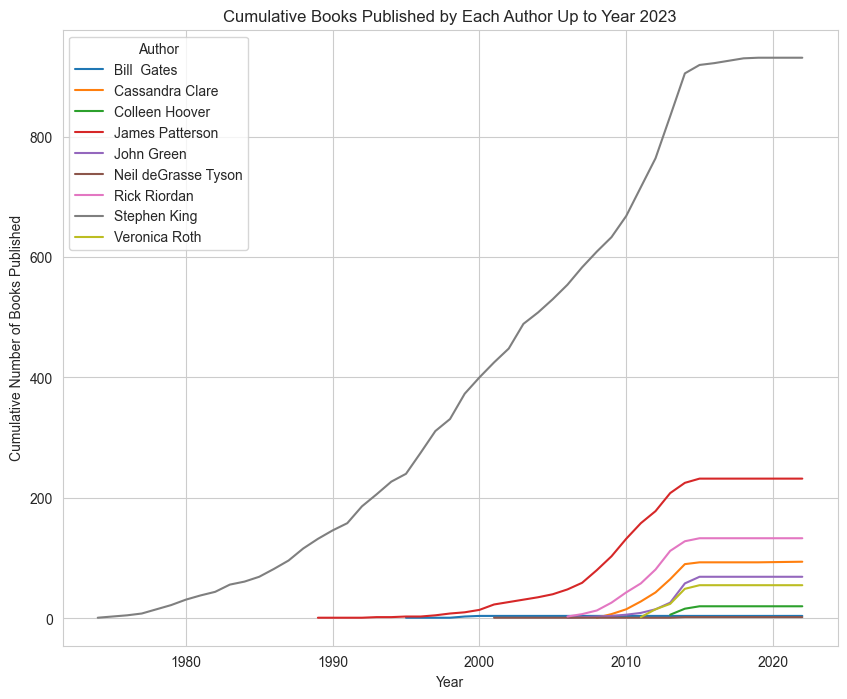

In [56]:

#for demonstartion purpose, I will show most 10 prolific authors
author_names = authors_df.nlargest(10, 'fans_count')['name'].tolist()
upper_year_limit = 2023


books_df['publication_date'] = pd.to_datetime(books_df['publication_date'], errors='coerce')
books_df = books_df.dropna(subset=['publication_date'])

books_df['year'] = books_df['publication_date'].dt.year

#filter books_df based on author name and year
filtered_books = books_df[books_df['author_name'].isin(author_names) & (books_df['year'] <= upper_year_limit)]

#group by author name and year and calculate the number of books published
books_per_year = filtered_books.groupby(['author_name', 'year']).size().reset_index(name='books_count')

#calculate cumulative books published by each author up to the given year
books_per_year = books_per_year.sort_values(by=['author_name', 'year'])
books_per_year['cumulative_books'] = books_per_year.groupby('author_name')['books_count'].cumsum()

#pivot the dataframe to plot
pivot_df = books_per_year.pivot(index='year', columns='author_name', values='cumulative_books')

#fill missing values with the previous value
pivot_df.fillna(method='ffill', inplace=True)

# Plot the data
pivot_df.plot(figsize=(10, 8))
plt.title(f'Cumulative Books Published by Each Author Up to Year {upper_year_limit}')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Books Published')
plt.grid(True)
plt.legend(title='Author')
plt.show()


* For the demonstration purposes, I showed top 10 authors (based on their fans count) book numbers. Most of the writers' production rate is skyrocketing after 2010. Stephan King and James Patterson's production rates are highly different than rest of the top 10 authors.

### Research Question 7



#### 1.Estimate the probability that a book has over 30% of the ratings above 4.


In [57]:
import pandas as pd

def extract_ratings_above_4(rating_dist):
    #split the rating_dist column by '|' and get the first and last elements
    ratings = rating_dist.split('|')
    ratings_above_4 = int(ratings[0].split(':')[1])  #assuming '5' ratings come first in the column
    total_ratings = int(ratings[-1].split(':')[1])  #assuming 'total' ratings come last in the column
    return ratings_above_4, total_ratings

books_df[['ratings_above_4', 'total_ratings']] = books_df.apply(
        lambda row: extract_ratings_above_4(row['rating_dist']), axis=1, result_type='expand'
    )
#calculate the ratio of ratings above 4
books_df['above_4_ratio'] = books_df['ratings_above_4'] / books_df['total_ratings']
books_above_30_percent_count = len(books_df[books_df['above_4_ratio'] > 0.30])
probability = books_above_30_percent_count / len(books_df)

print(f"The estimated probability that a book has over 30% of its ratings above 4 is: {probability:.4f}")

The estimated probability that a book has over 30% of its ratings above 4 is: 0.4813


#### 2. Estimate the probability that an author publishes a new book within two years from its last work.


In [66]:
#processing the data
books_df['publication_date'] = pd.to_datetime(books_df['publication_date'], errors='coerce')
books_df = books_df.dropna(subset=['publication_date'])

#sort by author_id and publication_date
books_df = books_df.sort_values(by=['author_id', 'publication_date'])

#just keep the first book of each author
books_df = books_df.drop_duplicates(subset=['work_id'], keep='first')

#calculate the time gap between each book
books_df['days_to_next_book'] = books_df.groupby('author_id')['publication_date'].diff(periods=-1).dt.days.abs()

books_within_two_years = books_df['days_to_next_book'] <= 730

#calculate the probability of publishing a book within two years
probability_per_author = books_within_two_years.groupby(books_df['author_id']).mean()

#calculate the overall probability
overall_probability = probability_per_author.mean()

overall_probability


0.16535326554244684

#### 3.In the file list.json, you will find a peculiar list named "The Worst Books of All Time." Estimate the probability of a book being included in this list, knowing it has more than 700 pages.

In [67]:
import pandas as pd
json_file_path = 'list.json'
chunk_size = 100000

df_list = []
for chunk in pd.read_json(json_file_path, lines=True, chunksize=chunk_size):
    df_list.append(chunk)
    

# Concatenate all DataFrames
list_df = pd.concat(df_list,ignore_index=True)


In [68]:
worst_books = [  book['title'] for book in list_df['books'].iloc[0]] #worst book is the first element of the list_df.
books_over_700_pages = books_df[books_df['num_pages'] > 700]
total_books_over_700_pages = len(books_over_700_pages)

books_in_worst_list = books_over_700_pages[books_over_700_pages['title'].isin(worst_books)]
probability = len(books_in_worst_list) / total_books_over_700_pages 

print(f"The probability of a book with more than 700 pages being included in 'The Worst Books of All Time' list is: {probability:.4f}")


The probability of a book with more than 700 pages being included in 'The Worst Books of All Time' list is: 0.0116


#### 4.Are the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent? Explain how you have obtained your answer.

In [69]:
books_over_700_pages = books_df[books_df['num_pages'] > 700]
total_books = len(books_df)
total_books_over_700_pages = len(books_over_700_pages)
total_worst_books = len(worst_books)


P_Y = total_books_over_700_pages / total_books
P_X = total_worst_books / total_books
P_X_and_Y = len(books_in_worst_list) / total_books

independence = P_X_and_Y == P_X * P_Y
independence

False

* For the independence P(X n Y ) should be equal to P(X) * P(Y). In this context:
* P(X) = Probability of being included in the worst books of all time list.
* P(Y) = Probability of having More than 700 Pages
* P(X n Y ) = Probability of being in the worst books of all time and have more than 700 pages.

### Research Question 8

#### 1.Can you demonstrate that readers usually rate the longest books as the worst?


In [70]:
corr_df = books_df.dropna(subset=['num_pages', 'average_rating'])
corr_df = corr_df[corr_df['ratings_count'] != 0]
#drop duplicates based on work id
corr_df = corr_df.drop_duplicates(subset=['work_id'], keep='first')
correlation_coef, p_value = stats.pearsonr(corr_df['num_pages'], corr_df['average_rating'])
print(f"Correlation Coefficient: {correlation_coef}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Correlation Coefficient: 0.10437012872898867
P-value: 0.0
The correlation is statistically significant.


* No, with the correlation analysis, I can not sayt that readers usually rate the longest books as the worst.

#### 2.Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?

In [71]:
from scipy import stats

english_books = books_df[books_df['language'].str.startswith('en')]
non_english_books = books_df[~books_df['language'].str.startswith('en')]


t_stat, p_value = stats.ttest_ind(english_books['average_rating'], non_english_books['average_rating'], equal_var=False)
if p_value < 0.05:
    print(f"Statistically significant difference in average ratings (p = {p_value:.10f})")
else:
    print(f"No statistically significant difference in average ratings (p = {p_value:.10f})")


Statistically significant difference in average ratings (p = 0.0000000000)


#### 3.About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.

In [73]:
english_books

,title,author_id,author_name,work_id,language,average_rating,rating_dist,ratings_count,text_reviews_count,publication_date,format,num_pages,series_name,days_to_next_book
382671,The Restaurant at the End of the Universe (Hit...,4,Douglas Adams,1877624,eng,4,5:100956|4:89768|3:36362|2:5672|1:1554|total:2...,234312,5882,1980-01-01,,NaN,The Hitchhiker's Guide to the Galaxy,639
91417,The Hitchhiker's Guide to the Galaxy (Hitchhik...,4,Douglas Adams,3078186,eng,4,5:732776|4:424807|3:201406|2:58843|1:31812|tot...,1449644,30500,1981-10-01,,224,The Hitchhiker's Guide to the Galaxy,31
475224,Not 1982,4,Douglas Adams,1074447,eng,4,5:11|4:2|3:9|2:0|1:0|total:22,22,1,1981-11-01,,400,,699
46642,"Life, the Universe and Everything (Hitchhiker'...",4,Douglas Adams,74123,eng,4,5:86332|4:70265|3:33902|2:5323|1:1001|total:19...,196823,3552,1983-10-01,Mass Market Paperback,240,The Hitchhiker's Guide to the Galaxy,731
725805,"So Long, and Thanks for All the Fish",4,Douglas Adams,3078120,eng,4,5:56717|4:52186|3:28920|2:5671|1:851|total:144345,144345,2944,1985-11-01,Mass Market Paperback,204,The Hitchhiker's Guide to the Galaxy,912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118084,Reloaded (Dirty Dozen),20828584,Paul Anderson,3197733,eng,3,5:1|4:4|3:4|2:2|1:0|total:11,11,1,2007-09-01,Paperback,NaN,,NaN
6268810,Cloud of the Impossible: Negative Theology and...,20855803,Catherine Keller,42400389,eng,4,5:23|4:14|3:2|2:2|1:0|total:41,41,3,2014-12-01,Paperback,384,,NaN
1351003,The World's Best Dad,20918539,Valerie Taylor,4616632,eng,4,5:1|4:1|3:1|2:0|1:0|total:3,3,2,2000-02-01,Mass Market Paperback,256,,NaN
4331026,Realizing Significance,20990451,James Perry,22420922,eng,4,5:1|4:1|3:0|2:0|1:0|total:2,2,0,2012-11-01,Paperback,216,,NaN


In [75]:
#calculate  statistics for English books
english_stats = english_books.describe()

#calculate  statistics for non-English books
non_english_stats = non_english_books.describe()


# Print the statistics
print(f"English Books Statistics:\n{english_stats}")
print(f"Non-English Books Statistics:\n{non_english_stats}")


English Books Statistics:
       author_id  work_id  average_rating  ratings_count  text_reviews_count  \
count      60800    60800           60800          60800               60800   
mean     2224305 16233519               4           5658                 236   
min            4      115               0              0                   0   
25%        43626  2362801               4              6                   1   
50%       346732 14661452               4             34                   5   
75%      4397966 24931108               4            299                  30   
max     21048035 88941461               5        7146419              172877   
std      3168333 15003299               1          76149                2199   

                    publication_date  num_pages  days_to_next_book  
count                          60800      45182              38991  
mean   1997-10-19 14:18:36.000000128        227               1004  
min              1789-10-01 00:00:00          

* A box plot visually represents the distribution of the ratings through its quartiles, median, and potential outliers. The whiskers extend from the quartiles to the rest of the distribution, except for points that are determined to be “outliers” using a step of 1.5 times the IQR from the quartiles.

#### 4.It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.

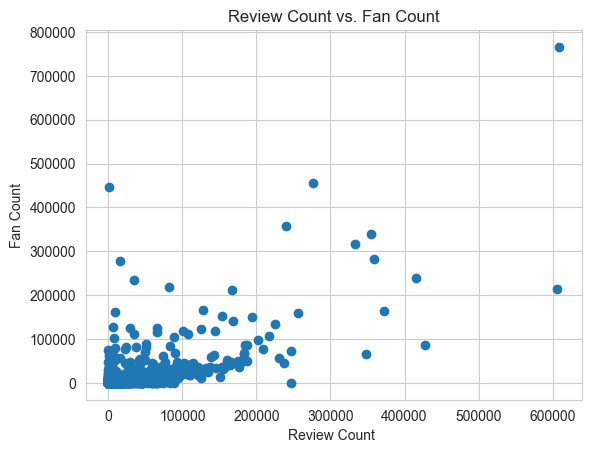

Correlation Coefficient: 0.6942710737997014
P-value: 0.0


In [76]:

#scatter plot
plt.scatter(authors_df['text_reviews_count'], authors_df['fans_count'])
plt.xlabel('Review Count ')
plt.ylabel('Fan Count')
plt.title('Review Count vs. Fan Count')
plt.show()

#correlation Coefficient
correlation_coef, p_value = stats.pearsonr(authors_df['text_reviews_count'], authors_df['fans_count'])
print(f"Correlation Coefficient: {correlation_coef}")
print(f"P-value: {p_value}")


* Based on the correlation test result and p-value, it can be seen that there is strong correlation between review count and fan counts of the authors.

#### 5.Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.

Hypothesis design is the most critical part for conducting statistical test. There are 2 main hypotheses.
* Null Hypothesis (H0): This is a statement of no effect or no difference. It is what you aim to test against and is presumed true until evidence suggests otherwise.
* Alternative Hypothesis (H1 or Ha): This is a statement indicating the presence of an effect or difference. If the evidence contradicts the null hypothesis strongly enough, you may reject H0 in favor of H1.


Parametric Tests:

* Assumptions: Require data to follow a normal distribution.
* Data Type: Best for interval or ratio data that are normally distributed.
* Statistical Power: More powerful when assumptions are met; can detect smaller effects.
* Hypothesis Testing: Specific, often about population parameters like means or variances.
* Examples: t-tests, ANOVA, linear regression.


Nonparametric Tests:

* Assumptions: Do not require data to follow a specific distribution.
* Data Type: Suitable for ordinal data or non-normally distributed interval/ratio data.
* Statistical Power: Generally less powerful; may require larger sample sizes for the same power level.
* Hypothesis Testing: Broader, often about medians or distribution shapes.
* Examples: Mann-Whitney U test, Wilcoxon signed-rank test, Kruskal-Wallis test, Spearman's correlation.




We will use parametric tests when data meet normality assumptions and are appropriately scaled.

We will use nonparametric tests when data violate normality assumptions or are not scaled as interval or ratio.

# Algorithmic Question (AQ)

**1- Implement a code to answer the problem above.**

In [ ]:
from collections import deque

def min_books(n, books, res):
    min_moves = 0
    R = books[-1]
    L = books[0]
    i = 1
    while (R != n) and (L != n):
        R = books[len(books)-i-1]
        L = books[i]
        min_moves += 1
        i += 1
    res.append(min_moves)

if __name__ == '__main__':
    N = int(input())
    books = deque()
    res = list()
    for i in range (N):
        command = input().split()
        if command[0] == 'R':
            books.append(int(command[1]))
        elif command[0] == 'L':
            books.appendleft(int(command[1]))
        else:
            min_books(int(command[1]), books, res)
    for elem in res:
        print(elem)

17
R 1
L 2
L 3
L 4
? 3
R 5
R 6
L 7
L 8
? 4
L 9
R 10
R 11
L 12
L 13
? 11
? 3
1
2
0
6


**2- Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation). Do you believe this is correct? How can you double-check it? Elaborate about your answer.**

We asked ChatGPT to check our code's complexity and this is the answer I got:

"The time complexity of the code you provided is O(N), where N is the number of commands given. Your code has a linear time complexity, which means that its execution time grows linearly with the input size N. This code processes each command sequentially and calculates the minimum number of books to pop from either end of the deque for each type 3 instruction."

Let's analyze the code's complexity section by section to check if the complexity proposed by ChatGPT is correct:
- The inizialization part involves operations that have complexity O(1), as they do not depend on the size of the input.
- Then the code iterates through the N commands in a loop, so this part has a complexity of O(N).
- Inside the loop, for each 'R' or 'L' command, the code appends an element to the deque *books*. Deques provide a constant complexity O(1) for append and pop operations even at the begining, thus improving on lists that provide O(n) time complexity.
- In case of type 3 instructions, the function *min_books* is called. In the worst case, the while loop which calculates the minimum number of movements required, will need to traverse all the deque. So the complexity may be O(M) with M < N, where M is the number of books in the shelf. All other operations inside this function have cost O(1).
- Fianlly, printing the output has a complexity of O(K) with K < N, where K is the number of results.

Therefore, the overall complexity of the code is:

$$O(1) + O(N) * O(1) * O(M) + O(K) = O(N * M)$$ 

in the worst case, as K < N, so we can say that the total complexity is quadratic O(N$^2$) as M < N. However, in the most real-world cases, the actual complexity will be less than O(N$^2$) as it is unlikely that the loop in the min_books function iterates through all the books in the deque. Therefore, ChatGPT may have considered that the cost of this function is closer to O(1) on average, and so on the overall complexity of the code would be O(N):
$$O(1) + O(N) * O(1) * O(1) + O(K) = O(N)$$ 

**3- Is the algorithm proposed in (1.) the optimal one to produce the required output? If not, can you suggest a better algorithm to perform the same task?**

In order to have a better algorithm to perform this task, we would need to implement an algorithm which has linear complexity O(N) for all possible cases. After thinking how we could manage to find the minimum number of moves required in constant time, we finally thought about using 2 dictionaries to keep track of the positions of the books, one for the left side and the other for the right side. In this way, the algorithm could perform type 3 instructions in O(1) time complexity, and the overall complexity would be O(N). Here is the final code:

In [ ]:
if __name__ == '__main__':
    N = int(input())

    left_positions = {}
    right_positions = {}
    left_books = list()
    right_books = list()
    res = list()

    for i in range(N):
        command = input().split()
        if command[0] == 'L':
            left_books.append(int(command[1]))
            left_positions[int(command[1])] = len(left_books)
        elif command[0] == 'R':
            right_books.append(int(command[1]))
            right_positions[int(command[1])] = len(right_books)
        else:
            left_index = left_positions.get(int(command[1]), float('inf'))
            right_index = right_positions.get(int(command[1]), float('inf'))
            if left_index != float('inf'):
                min_moves = min(len(left_positions) - left_index, len(right_books) + left_index - 1)
            else:
                min_moves = min(len(right_positions) - right_index, len(left_books) + right_index - 1)
            res.append(min_moves)

    for elem in res:
        print(elem)

17
R 1
L 2
L 3
L 4
? 3
R 5
R 6
L 7
L 8
? 4
L 9
R 10
R 11
L 12
L 13
? 11
? 3
1
2
0
6


Let's see how the complexity has been improved:

- For the inizialization part, the complexity remains constant O(1), as the inizialization of dictionaries and lists does not depend on the size of the input.
- Then for the loop we still have linear complexity O(N), and for each 'R' or 'L' command the cost is O(1).
- In case of type 3 instructions, with this algorithm we have achieved also constant time complexity O(1), as it only requires looking up in a dictionary and calculating the minimum number of moves.
- And finally, appending the results has a complexity of O(1) and printing them has a linear cost O(K) as in the previous code.

Therefore, the overall complexity of the final code is:

$$O(1) + O(N) * O(1) * O(1) + O(K) = O(N)$$ 

17
R 1
L 2
L 3
L 4
? 3
R 5
R 6
L 7
L 8
? 4
L 9
R 10
R 11
L 12
L 13
? 11
? 3
1
2
0
6


17
R 1
L 2
L 3
L 4
? 3
R 5
R 6
L 7
L 8
? 4
L 9
R 10
R 11
L 12
L 13
? 11
? 3
1
2
0
6
